In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import math
import category_encoders as ce


In [111]:
data = pd.read_csv("Desktop/FlightDelayProject (6).csv")

In [112]:
l = data['Used Date'][0] 
temp = re.findall(r'\d+', l) 
res = np.array(list(map(int, temp)))    

for i in range(1,data.shape[0]):
    l = data['Used Date'][i] 
    temp = re.findall(r'\d+', l) 
    a = np.array(list(map(int, temp)))
    res = np.concatenate([res,a] , axis = 0) 
r = np.reshape(res,(-1,3))
r.shape
d = pd.DataFrame(r)
d = d.rename(columns = {0:'Date',1:'Month',2:'Year'})
data = pd.concat([data,d],axis = 1)

In [113]:
data = data.drop(['Used Date','Unnamed: 29','Unnamed: 30','Unnamed: 31'],axis = 1)

In [114]:
data = pd.get_dummies(data, columns = ['From','To','Airline'])
data = data.drop(['From_BLR','To_BOM','Airline_Air Asia'],axis = 1)

In [115]:
data = data.drop(7).reset_index(drop = True)

In [116]:
l1 = data.index[data['Arrival'] == '-1'].tolist()
l2 = data.index[data['Scheduled Arrival'] == '-1'].tolist()

data = data.drop(l1).reset_index(drop = True)
data = data.drop(l2).reset_index(drop = True)

In [117]:
data = data.drop(['SDEP','Departure','DEP','Scheduled Departure'],axis = 1)
data = data.drop('Departure Delay',axis = 1)

In [118]:
for i in range(data.shape[0]):
    if data['ARR'][i] - math.floor(data['ARR'][i]/100)*100 >= 30:
        data['ARR'][i] = math.ceil(data['ARR'][i]/100)
    else:
        data['ARR'][i] = math.floor(data['ARR'][i]/100)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [119]:
data = data.drop(['Category'],axis = 1)

In [120]:
pd.get_dummies(data, columns = ['weather__hourly__weatherDesc__value'])

ce_bin = ce.BinaryEncoder(cols = ['weather__hourly__weatherDesc__value'])
ce_bin.fit(data,data['Arrival Delay'])

d = ce_bin.transform(data)

data = d

In [121]:
from datetime import datetime
d = pd.DataFrame(np.zeros((data.shape[0],2)))
# arr_t1 = datetime.strptime(data['Arrival'][0],'%H:%M')
# arr_t2 = datetime.strptime(data['Scheduled Arrival'][0],'%H:%M')
# diff = arr_t1 - arr_t2   
# diff = str(diff)
# d.append(diff)
# print(type(diff))
print(d)
for i in range(data.shape[0]):
    arr_t1 = datetime.strptime(data['Arrival'][i],'%H:%M')
    arr_t2 = datetime.strptime(data['Scheduled Arrival'][i],'%H:%M')
    if arr_t1 >= arr_t2:
        dif = str(arr_t1 - arr_t2)
        print(arr_t1,arr_t2)
        print(i,dif)
        print('\n')
        d[0][i] = dif
    if arr_t1 < arr_t2:
        dif = str(arr_t2 - arr_t1)
        print(arr_t1,arr_t2)
        print(i,dif)
        print('\n')
        d[0][i] = dif
        d[1][i] = 1
        
    


         0    1
0      0.0  0.0
1      0.0  0.0
2      0.0  0.0
3      0.0  0.0
4      0.0  0.0
...    ...  ...
10556  0.0  0.0
10557  0.0  0.0
10558  0.0  0.0
10559  0.0  0.0
10560  0.0  0.0

[10561 rows x 2 columns]
1900-01-01 08:16:00 1900-01-01 08:15:00
0 0:01:00


1900-01-01 06:55:00 1900-01-01 07:00:00
1 0:05:00


1900-01-01 08:02:00 1900-01-01 08:15:00
2 0:13:00


1900-01-01 19:42:00 1900-01-01 19:55:00
3 0:13:00


1900-01-01 22:14:00 1900-01-01 22:10:00
4 0:04:00


1900-01-01 12:58:00 1900-01-01 13:10:00
5 0:12:00


1900-01-01 14:36:00 1900-01-01 14:10:00
6 0:26:00


1900-01-01 14:56:00 1900-01-01 14:55:00
7 0:01:00


1900-01-01 15:48:00 1900-01-01 15:55:00
8 0:07:00


1900-01-01 16:28:00 1900-01-01 16:30:00
9 0:02:00


1900-01-01 16:34:00 1900-01-01 16:45:00
10 0:11:00


1900-01-01 17:20:00 1900-01-01 17:20:00
11 0:00:00


1900-01-01 17:59:00 1900-01-01 17:45:00
12 0:14:00


1900-01-01 18:29:00 1900-01-01 18:20:00
13 0:09:00


1900-01-01 19:03:00 1900-01-01 18:55:00
14 0:08:00

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1900-01-01 23:33:00 1900-01-01 23:00:00
215 0:33:00


1900-01-01 23:00:00 1900-01-01 23:00:00
216 0:00:00


1900-01-01 23:24:00 1900-01-01 23:25:00
217 0:01:00


1900-01-01 00:57:00 1900-01-01 00:10:00
218 0:47:00


1900-01-01 00:50:00 1900-01-01 00:10:00
219 0:40:00


1900-01-01 01:40:00 1900-01-01 00:55:00
220 0:45:00


1900-01-01 01:48:00 1900-01-01 02:15:00
221 0:27:00


1900-01-01 07:09:00 1900-01-01 07:25:00
222 0:16:00


1900-01-01 07:06:00 1900-01-01 07:10:00
223 0:04:00


1900-01-01 08:29:00 1900-01-01 08:35:00
224 0:06:00


1900-01-01 08:10:00 1900-01-01 08:15:00
225 0:05:00


1900-01-01 11:07:00 1900-01-01 11:05:00
226 0:02:00


1900-01-01 10:39:00 1900-01-01 10:55:00
227 0:16:00


1900-01-01 13:11:00 1900-01-01 12:55:00
228 0:16:00


1900-01-01 12:34:00 1900-01-01 12:35:00
229 0:01:00


1900-01-01 14:05:00 1900-01-01 13:55:00
230 0:10:00


1900-01-01 17:19:00 1900-01-01 17:05:00
231 0:14:00


1900-01-01 18:30:00 1900-01-01 17:50:00
232 0:40:00


1900-01-01 19:56:00 1900-01-



1900-01-01 00:06:00 1900-01-01 23:25:00
422 23:19:00


1900-01-01 01:06:00 1900-01-01 00:10:00
423 0:56:00


1900-01-01 01:24:00 1900-01-01 00:55:00
424 0:29:00


1900-01-01 02:00:00 1900-01-01 02:15:00
425 0:15:00


1900-01-01 07:12:00 1900-01-01 07:25:00
426 0:13:00


1900-01-01 07:08:00 1900-01-01 07:10:00
427 0:02:00


1900-01-01 08:42:00 1900-01-01 08:35:00
428 0:07:00


1900-01-01 08:09:00 1900-01-01 08:15:00
429 0:06:00


1900-01-01 10:48:00 1900-01-01 10:05:00
430 0:43:00


1900-01-01 10:25:00 1900-01-01 09:55:00
431 0:30:00


1900-01-01 10:07:00 1900-01-01 09:45:00
432 0:22:00


1900-01-01 12:24:00 1900-01-01 12:35:00
433 0:11:00


1900-01-01 13:59:00 1900-01-01 13:55:00
434 0:04:00


1900-01-01 16:50:00 1900-01-01 17:05:00
435 0:15:00


1900-01-01 18:03:00 1900-01-01 17:50:00
436 0:13:00


1900-01-01 20:30:00 1900-01-01 19:55:00
437 0:35:00


1900-01-01 22:30:00 1900-01-01 22:10:00
438 0:20:00


1900-01-01 22:42:00 1900-01-01 23:00:00
439 0:18:00


1900-01-01 00:45:00 1900-


1900-01-01 08:38:00 1900-01-01 08:35:00
618 0:03:00


1900-01-01 08:11:00 1900-01-01 08:15:00
619 0:04:00


1900-01-01 11:01:00 1900-01-01 11:05:00
620 0:04:00


1900-01-01 10:38:00 1900-01-01 10:55:00
621 0:17:00


1900-01-01 11:02:00 1900-01-01 10:55:00
622 0:07:00


1900-01-01 13:26:00 1900-01-01 12:55:00
623 0:31:00


1900-01-01 12:54:00 1900-01-01 12:35:00
624 0:19:00


1900-01-01 14:12:00 1900-01-01 13:55:00
625 0:17:00


1900-01-01 17:04:00 1900-01-01 17:05:00
626 0:01:00


1900-01-01 18:15:00 1900-01-01 17:50:00
627 0:25:00


1900-01-01 19:52:00 1900-01-01 19:55:00
628 0:03:00


1900-01-01 22:54:00 1900-01-01 23:00:00
629 0:06:00


1900-01-01 01:10:00 1900-01-01 00:30:00
630 0:40:00


1900-01-01 00:20:00 1900-01-01 00:30:00
631 0:10:00


1900-01-01 02:17:00 1900-01-01 02:20:00
632 0:03:00


1900-01-01 09:17:00 1900-01-01 08:55:00
633 0:22:00


1900-01-01 09:28:00 1900-01-01 08:35:00
634 0:53:00


1900-01-01 09:38:00 1900-01-01 09:15:00
635 0:23:00


1900-01-01 09:18:00 1900-01



1900-01-01 17:22:00 1900-01-01 17:05:00
822 0:17:00


1900-01-01 18:12:00 1900-01-01 17:50:00
823 0:22:00


1900-01-01 20:28:00 1900-01-01 19:55:00
824 0:33:00


1900-01-01 23:38:00 1900-01-01 23:00:00
825 0:38:00


1900-01-01 00:35:00 1900-01-01 00:30:00
826 0:05:00


1900-01-01 00:45:00 1900-01-01 00:30:00
827 0:15:00


1900-01-01 03:29:00 1900-01-01 02:20:00
828 1:09:00


1900-01-01 07:39:00 1900-01-01 07:10:00
829 0:29:00


1900-01-01 09:41:00 1900-01-01 08:55:00
830 0:46:00


1900-01-01 09:23:00 1900-01-01 08:35:00
831 0:48:00


1900-01-01 09:48:00 1900-01-01 09:15:00
832 0:33:00


1900-01-01 09:21:00 1900-01-01 09:10:00
833 0:11:00


1900-01-01 09:37:00 1900-01-01 09:10:00
834 0:27:00


1900-01-01 10:27:00 1900-01-01 10:30:00
835 0:03:00


1900-01-01 11:04:00 1900-01-01 10:35:00
836 0:29:00


1900-01-01 12:18:00 1900-01-01 12:40:00
837 0:22:00


1900-01-01 14:57:00 1900-01-01 12:20:00
838 2:37:00


1900-01-01 13:49:00 1900-01-01 12:45:00
839 1:04:00


1900-01-01 13:25:00 1900-0

1900-01-01 03:54:00 1900-01-01 02:20:00
1018 1:34:00


1900-01-01 07:42:00 1900-01-01 07:10:00
1019 0:32:00


1900-01-01 09:05:00 1900-01-01 08:55:00
1020 0:10:00


1900-01-01 08:49:00 1900-01-01 08:35:00
1021 0:14:00


1900-01-01 09:32:00 1900-01-01 09:15:00
1022 0:17:00


1900-01-01 09:13:00 1900-01-01 09:10:00
1023 0:03:00


1900-01-01 10:44:00 1900-01-01 10:30:00
1024 0:14:00


1900-01-01 11:21:00 1900-01-01 10:35:00
1025 0:46:00


1900-01-01 12:30:00 1900-01-01 11:55:00
1026 0:35:00


1900-01-01 14:30:00 1900-01-01 12:20:00
1027 2:10:00


1900-01-01 15:05:00 1900-01-01 12:45:00
1028 2:20:00


1900-01-01 13:55:00 1900-01-01 12:55:00
1029 1:00:00


1900-01-01 16:09:00 1900-01-01 15:15:00
1030 0:54:00


1900-01-01 17:59:00 1900-01-01 15:15:00
1031 2:44:00


1900-01-01 16:35:00 1900-01-01 16:10:00
1032 0:25:00


1900-01-01 19:56:00 1900-01-01 19:50:00
1033 0:06:00


1900-01-01 20:53:00 1900-01-01 19:05:00
1034 1:48:00


1900-01-01 22:12:00 1900-01-01 20:25:00
1035 1:47:00


1900-01-01

1212 0:05:00


1900-01-01 22:11:00 1900-01-01 21:05:00
1213 1:06:00


1900-01-01 23:38:00 1900-01-01 22:05:00
1214 1:33:00


1900-01-01 23:26:00 1900-01-01 22:45:00
1215 0:41:00


1900-01-01 23:27:00 1900-01-01 23:15:00
1216 0:12:00


1900-01-01 00:35:00 1900-01-01 23:30:00
1217 22:55:00


1900-01-01 01:41:00 1900-01-01 23:55:00
1218 22:14:00


1900-01-01 02:14:00 1900-01-01 02:15:00
1219 0:01:00


1900-01-01 07:26:00 1900-01-01 07:20:00
1220 0:06:00


1900-01-01 08:35:00 1900-01-01 08:10:00
1221 0:25:00


1900-01-01 08:54:00 1900-01-01 08:30:00
1222 0:24:00


1900-01-01 11:10:00 1900-01-01 10:30:00
1223 0:40:00


1900-01-01 10:15:00 1900-01-01 10:10:00
1224 0:05:00


1900-01-01 09:54:00 1900-01-01 09:55:00
1225 0:01:00


1900-01-01 14:40:00 1900-01-01 13:00:00
1226 1:40:00


1900-01-01 14:22:00 1900-01-01 14:35:00
1227 0:13:00


1900-01-01 18:54:00 1900-01-01 18:15:00
1228 0:39:00


1900-01-01 20:47:00 1900-01-01 20:45:00
1229 0:02:00


1900-01-01 23:45:00 1900-01-01 23:50:00
1230 0:0

1900-01-01 08:12:00 1900-01-01 08:20:00
1406 0:08:00


1900-01-01 07:46:00 1900-01-01 07:50:00
1407 0:04:00


1900-01-01 08:28:00 1900-01-01 08:15:00
1408 0:13:00


1900-01-01 09:26:00 1900-01-01 09:10:00
1409 0:16:00


1900-01-01 08:33:00 1900-01-01 08:55:00
1410 0:22:00


1900-01-01 09:10:00 1900-01-01 09:25:00
1411 0:15:00


1900-01-01 08:47:00 1900-01-01 09:05:00
1412 0:18:00


1900-01-01 10:40:00 1900-01-01 08:50:00
1413 1:50:00


1900-01-01 13:54:00 1900-01-01 10:10:00
1414 3:44:00


1900-01-01 09:34:00 1900-01-01 09:40:00
1415 0:06:00


1900-01-01 09:52:00 1900-01-01 10:05:00
1416 0:13:00


1900-01-01 10:36:00 1900-01-01 10:50:00
1417 0:14:00


1900-01-01 13:28:00 1900-01-01 11:20:00
1418 2:08:00


1900-01-01 13:48:00 1900-01-01 13:10:00
1419 0:38:00


1900-01-01 14:25:00 1900-01-01 13:00:00
1420 1:25:00


1900-01-01 12:38:00 1900-01-01 12:15:00
1421 0:23:00


1900-01-01 13:28:00 1900-01-01 12:10:00
1422 1:18:00


1900-01-01 14:25:00 1900-01-01 13:25:00
1423 1:00:00


1900-01-01

1900-01-01 09:43:00 1900-01-01 09:25:00
1613 0:18:00


1900-01-01 09:50:00 1900-01-01 09:25:00
1614 0:25:00


1900-01-01 09:55:00 1900-01-01 09:35:00
1615 0:20:00


1900-01-01 13:09:00 1900-01-01 12:30:00
1616 0:39:00


1900-01-01 12:22:00 1900-01-01 12:25:00
1617 0:03:00


1900-01-01 18:28:00 1900-01-01 18:00:00
1618 0:28:00


1900-01-01 18:35:00 1900-01-01 18:20:00
1619 0:15:00


1900-01-01 20:15:00 1900-01-01 19:35:00
1620 0:40:00


1900-01-01 21:39:00 1900-01-01 20:50:00
1621 0:49:00


1900-01-01 21:36:00 1900-01-01 20:55:00
1622 0:41:00


1900-01-01 23:30:00 1900-01-01 22:35:00
1623 0:55:00


1900-01-01 23:27:00 1900-01-01 23:20:00
1624 0:07:00


1900-01-01 22:41:00 1900-01-01 22:45:00
1625 0:04:00


1900-01-01 00:01:00 1900-01-01 23:30:00
1626 23:29:00


1900-01-01 23:20:00 1900-01-01 23:30:00
1627 0:10:00


1900-01-01 00:20:00 1900-01-01 00:05:00
1628 0:15:00


1900-01-01 01:18:00 1900-01-01 01:00:00
1629 0:18:00


1900-01-01 02:36:00 1900-01-01 01:45:00
1630 0:51:00


1900-01-0

1809 0:27:00


1900-01-01 23:38:00 1900-01-01 23:50:00
1810 0:12:00


1900-01-01 23:18:00 1900-01-01 23:10:00
1811 0:08:00


1900-01-01 01:54:00 1900-01-01 02:10:00
1812 0:16:00


1900-01-01 09:21:00 1900-01-01 09:10:00
1813 0:11:00


1900-01-01 09:07:00 1900-01-01 09:05:00
1814 0:02:00


1900-01-01 08:44:00 1900-01-01 08:50:00
1815 0:06:00


1900-01-01 10:23:00 1900-01-01 10:10:00
1816 0:13:00


1900-01-01 10:01:00 1900-01-01 10:05:00
1817 0:04:00


1900-01-01 11:57:00 1900-01-01 11:20:00
1818 0:37:00


1900-01-01 13:12:00 1900-01-01 13:00:00
1819 0:12:00


1900-01-01 13:48:00 1900-01-01 13:20:00
1820 0:28:00


1900-01-01 12:28:00 1900-01-01 12:10:00
1821 0:18:00


1900-01-01 13:43:00 1900-01-01 13:25:00
1822 0:18:00


1900-01-01 17:11:00 1900-01-01 14:35:00
1823 2:36:00


1900-01-01 15:24:00 1900-01-01 14:55:00
1824 0:29:00


1900-01-01 16:05:00 1900-01-01 15:50:00
1825 0:15:00


1900-01-01 17:00:00 1900-01-01 16:30:00
1826 0:30:00


1900-01-01 17:24:00 1900-01-01 17:20:00
1827 0:04:

2006 0:04:00


1900-01-01 11:33:00 1900-01-01 11:30:00
2007 0:03:00


1900-01-01 11:34:00 1900-01-01 11:20:00
2008 0:14:00


1900-01-01 12:16:00 1900-01-01 11:50:00
2009 0:26:00


1900-01-01 13:33:00 1900-01-01 13:20:00
2010 0:13:00


1900-01-01 14:12:00 1900-01-01 14:10:00
2011 0:02:00


1900-01-01 16:54:00 1900-01-01 16:25:00
2012 0:29:00


1900-01-01 16:33:00 1900-01-01 15:40:00
2013 0:53:00


1900-01-01 11:36:00 1900-01-01 11:00:00
2014 0:36:00


1900-01-01 16:56:00 1900-01-01 16:55:00
2015 0:01:00


1900-01-01 07:29:00 1900-01-01 07:10:00
2016 0:19:00


1900-01-01 21:00:00 1900-01-01 19:55:00
2017 1:05:00


1900-01-01 23:06:00 1900-01-01 22:05:00
2018 1:01:00


1900-01-01 12:51:00 1900-01-01 12:25:00
2019 0:26:00


1900-01-01 11:08:00 1900-01-01 10:45:00
2020 0:23:00


1900-01-01 12:16:00 1900-01-01 11:30:00
2021 0:46:00


1900-01-01 11:32:00 1900-01-01 11:50:00
2022 0:18:00


1900-01-01 14:10:00 1900-01-01 14:10:00
2023 0:00:00


1900-01-01 16:47:00 1900-01-01 16:25:00
2024 0:22:

1900-01-01 00:17:00 1900-01-01 23:50:00
2224 23:33:00


1900-01-01 02:11:00 1900-01-01 00:20:00
2225 1:51:00


1900-01-01 02:10:00 1900-01-01 02:10:00
2226 0:00:00


1900-01-01 03:15:00 1900-01-01 03:30:00
2227 0:15:00


1900-01-01 03:55:00 1900-01-01 03:55:00
2228 0:00:00


1900-01-01 04:53:00 1900-01-01 04:25:00
2229 0:28:00


1900-01-01 07:33:00 1900-01-01 06:50:00
2230 0:43:00


1900-01-01 07:33:00 1900-01-01 07:00:00
2231 0:33:00


1900-01-01 08:06:00 1900-01-01 07:00:00
2232 1:06:00


1900-01-01 06:32:00 1900-01-01 06:40:00
2233 0:08:00


1900-01-01 06:56:00 1900-01-01 07:20:00
2234 0:24:00


1900-01-01 08:06:00 1900-01-01 08:20:00
2235 0:14:00


1900-01-01 07:49:00 1900-01-01 07:50:00
2236 0:01:00


1900-01-01 09:05:00 1900-01-01 08:55:00
2237 0:10:00


1900-01-01 09:55:00 1900-01-01 09:25:00
2238 0:30:00


1900-01-01 08:36:00 1900-01-01 08:50:00
2239 0:14:00


1900-01-01 13:30:00 1900-01-01 10:10:00
2240 3:20:00


1900-01-01 10:59:00 1900-01-01 09:40:00
2241 1:19:00


1900-01-0

2417 0:26:00


1900-01-01 13:08:00 1900-01-01 13:20:00
2418 0:12:00


1900-01-01 14:26:00 1900-01-01 14:15:00
2419 0:11:00


1900-01-01 16:57:00 1900-01-01 17:00:00
2420 0:03:00


1900-01-01 18:15:00 1900-01-01 17:45:00
2421 0:30:00


1900-01-01 16:35:00 1900-01-01 16:35:00
2422 0:00:00


1900-01-01 20:27:00 1900-01-01 20:20:00
2423 0:07:00


1900-01-01 20:15:00 1900-01-01 20:15:00
2424 0:00:00


1900-01-01 22:36:00 1900-01-01 22:25:00
2425 0:11:00


1900-01-01 21:32:00 1900-01-01 21:50:00
2426 0:18:00


1900-01-01 23:44:00 1900-01-01 22:45:00
2427 0:59:00


1900-01-01 23:18:00 1900-01-01 22:45:00
2428 0:33:00


1900-01-01 23:48:00 1900-01-01 23:45:00
2429 0:03:00


1900-01-01 23:25:00 1900-01-01 23:25:00
2430 0:00:00


1900-01-01 07:21:00 1900-01-01 07:10:00
2431 0:11:00


1900-01-01 08:45:00 1900-01-01 08:35:00
2432 0:10:00


1900-01-01 08:31:00 1900-01-01 08:15:00
2433 0:16:00


1900-01-01 12:34:00 1900-01-01 11:05:00
2434 1:29:00


1900-01-01 11:53:00 1900-01-01 10:55:00
2435 0:58:

1900-01-01 12:34:00 1900-01-01 11:30:00
2617 1:04:00


1900-01-01 10:33:00 1900-01-01 10:50:00
2618 0:17:00


1900-01-01 11:00:00 1900-01-01 11:20:00
2619 0:20:00


1900-01-01 14:22:00 1900-01-01 13:00:00
2620 1:22:00


1900-01-01 12:10:00 1900-01-01 12:15:00
2621 0:05:00


1900-01-01 12:04:00 1900-01-01 12:15:00
2622 0:11:00


1900-01-01 11:13:00 1900-01-01 11:15:00
2623 0:02:00


1900-01-01 13:18:00 1900-01-01 12:10:00
2624 1:08:00


1900-01-01 15:04:00 1900-01-01 13:25:00
2625 1:39:00


1900-01-01 14:18:00 1900-01-01 14:10:00
2626 0:08:00


1900-01-01 14:13:00 1900-01-01 14:20:00
2627 0:07:00


1900-01-01 15:14:00 1900-01-01 14:35:00
2628 0:39:00


1900-01-01 16:00:00 1900-01-01 16:25:00
2629 0:25:00


1900-01-01 18:06:00 1900-01-01 18:20:00
2630 0:14:00


1900-01-01 18:55:00 1900-01-01 18:55:00
2631 0:00:00


1900-01-01 20:00:00 1900-01-01 20:00:00
2632 0:00:00


1900-01-01 20:46:00 1900-01-01 20:20:00
2633 0:26:00


1900-01-01 21:10:00 1900-01-01 21:15:00
2634 0:05:00


1900-01-01


1900-01-01 08:57:00 1900-01-01 08:55:00
2818 0:02:00


1900-01-01 08:26:00 1900-01-01 08:35:00
2819 0:09:00


1900-01-01 09:21:00 1900-01-01 09:15:00
2820 0:06:00


1900-01-01 09:12:00 1900-01-01 09:10:00
2821 0:02:00


1900-01-01 10:20:00 1900-01-01 10:35:00
2822 0:15:00


1900-01-01 13:28:00 1900-01-01 11:55:00
2823 1:33:00


1900-01-01 12:55:00 1900-01-01 12:45:00
2824 0:10:00


1900-01-01 13:05:00 1900-01-01 12:55:00
2825 0:10:00


1900-01-01 13:25:00 1900-01-01 14:15:00
2826 0:50:00


1900-01-01 16:59:00 1900-01-01 15:15:00
2827 1:44:00


1900-01-01 16:16:00 1900-01-01 16:10:00
2828 0:06:00


1900-01-01 21:00:00 1900-01-01 19:50:00
2829 1:10:00


1900-01-01 19:05:00 1900-01-01 19:05:00
2830 0:00:00


1900-01-01 19:50:00 1900-01-01 19:50:00
2831 0:00:00


1900-01-01 21:11:00 1900-01-01 21:05:00
2832 0:06:00


1900-01-01 23:02:00 1900-01-01 22:45:00
2833 0:17:00


1900-01-01 23:36:00 1900-01-01 23:30:00
2834 0:06:00


1900-01-01 00:07:00 1900-01-01 23:55:00
2835 23:48:00


1900-01-

1900-01-01 18:39:00 1900-01-01 18:20:00
3022 0:19:00


1900-01-01 17:52:00 1900-01-01 18:10:00
3023 0:18:00


1900-01-01 20:49:00 1900-01-01 20:50:00
3024 0:01:00


1900-01-01 22:55:00 1900-01-01 22:15:00
3025 0:40:00


1900-01-01 23:20:00 1900-01-01 23:20:00
3026 0:00:00


1900-01-01 23:04:00 1900-01-01 22:55:00
3027 0:09:00


1900-01-01 23:30:00 1900-01-01 23:30:00
3028 0:00:00


1900-01-01 01:00:00 1900-01-01 01:00:00
3029 0:00:00


1900-01-01 02:50:00 1900-01-01 01:45:00
3030 1:05:00


1900-01-01 08:15:00 1900-01-01 08:15:00
3031 0:00:00


1900-01-01 09:32:00 1900-01-01 09:25:00
3032 0:07:00


1900-01-01 09:41:00 1900-01-01 09:35:00
3033 0:06:00


1900-01-01 09:55:00 1900-01-01 09:55:00
3034 0:00:00


1900-01-01 11:41:00 1900-01-01 11:20:00
3035 0:21:00


1900-01-01 13:20:00 1900-01-01 13:20:00
3036 0:00:00


1900-01-01 14:26:00 1900-01-01 14:15:00
3037 0:11:00


1900-01-01 14:30:00 1900-01-01 14:20:00
3038 0:10:00


1900-01-01 17:25:00 1900-01-01 17:00:00
3039 0:25:00


1900-01-01

3216 22:28:00


1900-01-01 23:18:00 1900-01-01 23:10:00
3217 0:08:00


1900-01-01 01:16:00 1900-01-01 00:10:00
3218 1:06:00


1900-01-01 03:12:00 1900-01-01 02:10:00
3219 1:02:00


1900-01-01 03:21:00 1900-01-01 03:30:00
3220 0:09:00


1900-01-01 03:57:00 1900-01-01 03:55:00
3221 0:02:00


1900-01-01 05:20:00 1900-01-01 04:25:00
3222 0:55:00


1900-01-01 06:24:00 1900-01-01 06:50:00
3223 0:26:00


1900-01-01 08:38:00 1900-01-01 07:00:00
3224 1:38:00


1900-01-01 06:56:00 1900-01-01 07:00:00
3225 0:04:00


1900-01-01 06:36:00 1900-01-01 06:40:00
3226 0:04:00


1900-01-01 07:13:00 1900-01-01 07:20:00
3227 0:07:00


1900-01-01 08:14:00 1900-01-01 08:20:00
3228 0:06:00


1900-01-01 07:35:00 1900-01-01 07:50:00
3229 0:15:00


1900-01-01 09:05:00 1900-01-01 08:55:00
3230 0:10:00


1900-01-01 09:59:00 1900-01-01 09:25:00
3231 0:34:00


1900-01-01 08:47:00 1900-01-01 08:50:00
3232 0:03:00


1900-01-01 10:13:00 1900-01-01 10:10:00
3233 0:03:00


1900-01-01 09:35:00 1900-01-01 09:40:00
3234 0:05

1900-01-01 22:44:00 1900-01-01 23:25:00
3423 0:41:00


1900-01-01 07:47:00 1900-01-01 07:10:00
3424 0:37:00


1900-01-01 09:09:00 1900-01-01 08:35:00
3425 0:34:00


1900-01-01 09:01:00 1900-01-01 08:15:00
3426 0:46:00


1900-01-01 14:33:00 1900-01-01 11:05:00
3427 3:28:00


1900-01-01 10:18:00 1900-01-01 09:55:00
3428 0:23:00


1900-01-01 13:00:00 1900-01-01 12:35:00
3429 0:25:00


1900-01-01 15:33:00 1900-01-01 13:55:00
3430 1:38:00


1900-01-01 19:05:00 1900-01-01 17:50:00
3431 1:15:00


1900-01-01 20:03:00 1900-01-01 19:20:00
3432 0:43:00


1900-01-01 21:51:00 1900-01-01 19:55:00
3433 1:56:00


1900-01-01 22:58:00 1900-01-01 23:00:00
3434 0:02:00


1900-01-01 01:15:00 1900-01-01 00:30:00
3435 0:45:00


1900-01-01 00:16:00 1900-01-01 00:30:00
3436 0:14:00


1900-01-01 03:28:00 1900-01-01 02:10:00
3437 1:18:00


1900-01-01 07:36:00 1900-01-01 07:10:00
3438 0:26:00


1900-01-01 09:13:00 1900-01-01 08:55:00
3439 0:18:00


1900-01-01 09:29:00 1900-01-01 08:35:00
3440 0:54:00


1900-01-01

1900-01-01 21:16:00 1900-01-01 20:50:00
3647 0:26:00


1900-01-01 22:30:00 1900-01-01 22:15:00
3648 0:15:00


1900-01-01 23:20:00 1900-01-01 23:20:00
3649 0:00:00


1900-01-01 23:03:00 1900-01-01 22:55:00
3650 0:08:00


1900-01-01 23:46:00 1900-01-01 23:30:00
3651 0:16:00


1900-01-01 02:36:00 1900-01-01 01:00:00
3652 1:36:00


1900-01-01 03:43:00 1900-01-01 01:45:00
3653 1:58:00


1900-01-01 08:15:00 1900-01-01 08:15:00
3654 0:00:00


1900-01-01 09:22:00 1900-01-01 09:25:00
3655 0:03:00


1900-01-01 09:44:00 1900-01-01 09:35:00
3656 0:09:00


1900-01-01 09:55:00 1900-01-01 09:55:00
3657 0:00:00


1900-01-01 11:20:00 1900-01-01 11:20:00
3658 0:00:00


1900-01-01 13:20:00 1900-01-01 13:20:00
3659 0:00:00


1900-01-01 14:25:00 1900-01-01 14:15:00
3660 0:10:00


1900-01-01 17:09:00 1900-01-01 17:00:00
3661 0:09:00


1900-01-01 18:11:00 1900-01-01 17:45:00
3662 0:26:00


1900-01-01 16:55:00 1900-01-01 16:35:00
3663 0:20:00


1900-01-01 20:27:00 1900-01-01 20:20:00
3664 0:07:00


1900-01-01

1900-01-01 11:31:00 1900-01-01 11:20:00
3861 0:11:00


1900-01-01 13:11:00 1900-01-01 12:15:00
3862 0:56:00


1900-01-01 12:31:00 1900-01-01 12:15:00
3863 0:16:00


1900-01-01 12:46:00 1900-01-01 13:00:00
3864 0:14:00


1900-01-01 12:13:00 1900-01-01 12:10:00
3865 0:03:00


1900-01-01 13:10:00 1900-01-01 13:25:00
3866 0:15:00


1900-01-01 14:12:00 1900-01-01 14:10:00
3867 0:02:00


1900-01-01 14:43:00 1900-01-01 14:25:00
3868 0:18:00


1900-01-01 14:25:00 1900-01-01 14:20:00
3869 0:05:00


1900-01-01 14:19:00 1900-01-01 14:35:00
3870 0:16:00


1900-01-01 16:15:00 1900-01-01 16:25:00
3871 0:10:00


1900-01-01 18:20:00 1900-01-01 18:20:00
3872 0:00:00


1900-01-01 18:52:00 1900-01-01 18:55:00
3873 0:03:00


1900-01-01 20:20:00 1900-01-01 20:00:00
3874 0:20:00


1900-01-01 20:12:00 1900-01-01 20:20:00
3875 0:08:00


1900-01-01 21:20:00 1900-01-01 21:15:00
3876 0:05:00


1900-01-01 21:24:00 1900-01-01 21:20:00
3877 0:04:00


1900-01-01 02:03:00 1900-01-01 21:40:00
3878 19:37:00


1900-01-0

4054 0:09:00


1900-01-01 18:42:00 1900-01-01 17:50:00
4055 0:52:00


1900-01-01 21:12:00 1900-01-01 19:55:00
4056 1:17:00


1900-01-01 23:24:00 1900-01-01 22:10:00
4057 1:14:00


1900-01-01 23:15:00 1900-01-01 23:00:00
4058 0:15:00


1900-01-01 01:47:00 1900-01-01 00:30:00
4059 1:17:00


1900-01-01 00:30:00 1900-01-01 00:30:00
4060 0:00:00


1900-01-01 03:35:00 1900-01-01 02:10:00
4061 1:25:00


1900-01-01 07:32:00 1900-01-01 07:10:00
4062 0:22:00


1900-01-01 08:29:00 1900-01-01 08:45:00
4063 0:16:00


1900-01-01 08:35:00 1900-01-01 08:35:00
4064 0:00:00


1900-01-01 09:55:00 1900-01-01 09:15:00
4065 0:40:00


1900-01-01 09:08:00 1900-01-01 09:10:00
4066 0:02:00


1900-01-01 10:35:00 1900-01-01 10:35:00
4067 0:00:00


1900-01-01 11:56:00 1900-01-01 11:55:00
4068 0:01:00


1900-01-01 12:54:00 1900-01-01 12:45:00
4069 0:09:00


1900-01-01 13:13:00 1900-01-01 12:55:00
4070 0:18:00


1900-01-01 11:31:00 1900-01-01 11:00:00
4071 0:31:00


1900-01-01 14:15:00 1900-01-01 14:15:00
4072 0:00:

1900-01-01 01:15:00 1900-01-01 01:15:00
4265 0:00:00


1900-01-01 01:02:00 1900-01-01 00:45:00
4266 0:17:00


1900-01-01 00:58:00 1900-01-01 00:55:00
4267 0:03:00


1900-01-01 02:15:00 1900-01-01 02:15:00
4268 0:00:00


1900-01-01 07:29:00 1900-01-01 07:10:00
4269 0:19:00


1900-01-01 08:54:00 1900-01-01 08:35:00
4270 0:19:00


1900-01-01 11:05:00 1900-01-01 11:15:00
4271 0:10:00


1900-01-01 18:30:00 1900-01-01 18:20:00
4272 0:10:00


1900-01-01 18:10:00 1900-01-01 18:10:00
4273 0:00:00


1900-01-01 21:37:00 1900-01-01 20:50:00
4274 0:47:00


1900-01-01 23:02:00 1900-01-01 22:15:00
4275 0:47:00


1900-01-01 23:20:00 1900-01-01 23:20:00
4276 0:00:00


1900-01-01 22:48:00 1900-01-01 22:55:00
4277 0:07:00


1900-01-01 23:35:00 1900-01-01 23:30:00
4278 0:05:00


1900-01-01 01:00:00 1900-01-01 01:00:00
4279 0:00:00


1900-01-01 02:35:00 1900-01-01 01:45:00
4280 0:50:00


1900-01-01 08:27:00 1900-01-01 08:15:00
4281 0:12:00


1900-01-01 09:29:00 1900-01-01 09:25:00
4282 0:04:00


1900-01-01



1900-01-01 06:51:00 1900-01-01 07:20:00
4476 0:29:00


1900-01-01 08:01:00 1900-01-01 08:20:00
4477 0:19:00


1900-01-01 07:45:00 1900-01-01 07:50:00
4478 0:05:00


1900-01-01 08:45:00 1900-01-01 08:55:00
4479 0:10:00


1900-01-01 09:16:00 1900-01-01 09:25:00
4480 0:09:00


1900-01-01 09:29:00 1900-01-01 08:50:00
4481 0:39:00


1900-01-01 10:50:00 1900-01-01 10:10:00
4482 0:40:00


1900-01-01 09:38:00 1900-01-01 09:40:00
4483 0:02:00


1900-01-01 11:10:00 1900-01-01 11:30:00
4484 0:20:00


1900-01-01 11:09:00 1900-01-01 10:50:00
4485 0:19:00


1900-01-01 11:10:00 1900-01-01 11:20:00
4486 0:10:00


1900-01-01 13:00:00 1900-01-01 13:00:00
4487 0:00:00


1900-01-01 12:31:00 1900-01-01 12:15:00
4488 0:16:00


1900-01-01 12:08:00 1900-01-01 12:15:00
4489 0:07:00


1900-01-01 12:55:00 1900-01-01 12:10:00
4490 0:45:00


1900-01-01 13:10:00 1900-01-01 13:25:00
4491 0:15:00


1900-01-01 14:36:00 1900-01-01 14:10:00
4492 0:26:00


1900-01-01 14:20:00 1900-01-01 14:25:00
4493 0:05:00


1900-01-

4682 0:00:00


1900-01-01 00:30:00 1900-01-01 00:30:00
4683 0:00:00


1900-01-01 02:59:00 1900-01-01 02:10:00
4684 0:49:00


1900-01-01 07:32:00 1900-01-01 07:10:00
4685 0:22:00


1900-01-01 08:29:00 1900-01-01 08:45:00
4686 0:16:00


1900-01-01 08:35:00 1900-01-01 08:35:00
4687 0:00:00


1900-01-01 09:24:00 1900-01-01 09:15:00
4688 0:09:00


1900-01-01 09:43:00 1900-01-01 09:10:00
4689 0:33:00


1900-01-01 10:45:00 1900-01-01 10:35:00
4690 0:10:00


1900-01-01 12:07:00 1900-01-01 11:55:00
4691 0:12:00


1900-01-01 12:45:00 1900-01-01 12:45:00
4692 0:00:00


1900-01-01 12:52:00 1900-01-01 12:55:00
4693 0:03:00


1900-01-01 14:02:00 1900-01-01 14:15:00
4694 0:13:00


1900-01-01 16:59:00 1900-01-01 15:15:00
4695 1:44:00


1900-01-01 16:13:00 1900-01-01 16:10:00
4696 0:03:00


1900-01-01 20:11:00 1900-01-01 19:50:00
4697 0:21:00


1900-01-01 19:05:00 1900-01-01 19:05:00
4698 0:00:00


1900-01-01 20:55:00 1900-01-01 19:50:00
4699 1:05:00


1900-01-01 21:05:00 1900-01-01 21:05:00
4700 0:00:

1900-01-01 08:09:00 1900-01-01 08:15:00
4900 0:06:00


1900-01-01 09:39:00 1900-01-01 09:25:00
4901 0:14:00


1900-01-01 09:48:00 1900-01-01 09:35:00
4902 0:13:00


1900-01-01 09:59:00 1900-01-01 09:55:00
4903 0:04:00


1900-01-01 11:46:00 1900-01-01 11:20:00
4904 0:26:00


1900-01-01 13:08:00 1900-01-01 13:20:00
4905 0:12:00


1900-01-01 14:32:00 1900-01-01 14:15:00
4906 0:17:00


1900-01-01 14:18:00 1900-01-01 14:20:00
4907 0:02:00


1900-01-01 16:55:00 1900-01-01 17:00:00
4908 0:05:00


1900-01-01 16:24:00 1900-01-01 16:35:00
4909 0:11:00


1900-01-01 20:27:00 1900-01-01 20:20:00
4910 0:07:00


1900-01-01 20:45:00 1900-01-01 20:15:00
4911 0:30:00


1900-01-01 22:30:00 1900-01-01 22:25:00
4912 0:05:00


1900-01-01 22:39:00 1900-01-01 21:50:00
4913 0:49:00


1900-01-01 22:44:00 1900-01-01 22:45:00
4914 0:01:00


1900-01-01 23:17:00 1900-01-01 22:45:00
4915 0:32:00


1900-01-01 00:05:00 1900-01-01 23:45:00
4916 23:40:00


1900-01-01 23:55:00 1900-01-01 23:25:00
4917 0:30:00


1900-01-0

1900-01-01 07:11:00 1900-01-01 07:00:00
5096 0:11:00


1900-01-01 06:40:00 1900-01-01 06:40:00
5097 0:00:00


1900-01-01 07:23:00 1900-01-01 07:20:00
5098 0:03:00


1900-01-01 08:00:00 1900-01-01 08:20:00
5099 0:20:00


1900-01-01 07:50:00 1900-01-01 07:50:00
5100 0:00:00


1900-01-01 08:52:00 1900-01-01 08:55:00
5101 0:03:00


1900-01-01 09:05:00 1900-01-01 09:25:00
5102 0:20:00


1900-01-01 08:42:00 1900-01-01 08:50:00
5103 0:08:00


1900-01-01 09:53:00 1900-01-01 10:10:00
5104 0:17:00


1900-01-01 09:40:00 1900-01-01 09:40:00
5105 0:00:00


1900-01-01 11:23:00 1900-01-01 11:30:00
5106 0:07:00


1900-01-01 11:04:00 1900-01-01 10:50:00
5107 0:14:00


1900-01-01 11:49:00 1900-01-01 11:20:00
5108 0:29:00


1900-01-01 13:16:00 1900-01-01 13:00:00
5109 0:16:00


1900-01-01 12:16:00 1900-01-01 12:15:00
5110 0:01:00


1900-01-01 12:30:00 1900-01-01 12:10:00
5111 0:20:00


1900-01-01 13:03:00 1900-01-01 13:20:00
5112 0:17:00


1900-01-01 13:54:00 1900-01-01 13:25:00
5113 0:29:00


1900-01-01

5294 0:04:00


1900-01-01 07:03:00 1900-01-01 07:25:00
5295 0:22:00


1900-01-01 07:06:00 1900-01-01 07:10:00
5296 0:04:00


1900-01-01 07:05:00 1900-01-01 07:10:00
5297 0:05:00


1900-01-01 08:13:00 1900-01-01 08:35:00
5298 0:22:00


1900-01-01 08:28:00 1900-01-01 08:35:00
5299 0:07:00


1900-01-01 08:03:00 1900-01-01 08:15:00
5300 0:12:00


1900-01-01 08:07:00 1900-01-01 08:15:00
5301 0:08:00


1900-01-01 10:55:00 1900-01-01 11:05:00
5302 0:10:00


1900-01-01 11:00:00 1900-01-01 11:05:00
5303 0:05:00


1900-01-01 10:30:00 1900-01-01 10:55:00
5304 0:25:00


1900-01-01 12:40:00 1900-01-01 12:50:00
5305 0:10:00


1900-01-01 12:57:00 1900-01-01 12:50:00
5306 0:07:00


1900-01-01 12:32:00 1900-01-01 12:35:00
5307 0:03:00


1900-01-01 12:33:00 1900-01-01 12:35:00
5308 0:02:00


1900-01-01 14:04:00 1900-01-01 13:55:00
5309 0:09:00


1900-01-01 14:05:00 1900-01-01 13:55:00
5310 0:10:00


1900-01-01 17:05:00 1900-01-01 17:05:00
5311 0:00:00


1900-01-01 17:50:00 1900-01-01 17:50:00
5312 0:00:

1900-01-01 09:50:00 1900-01-01 09:50:00
5476 0:00:00


1900-01-01 10:02:00 1900-01-01 10:30:00
5477 0:28:00


1900-01-01 11:10:00 1900-01-01 11:10:00
5478 0:00:00


1900-01-01 14:34:00 1900-01-01 14:35:00
5479 0:01:00


1900-01-01 18:26:00 1900-01-01 18:15:00
5480 0:11:00


1900-01-01 23:41:00 1900-01-01 23:50:00
5481 0:09:00


1900-01-01 23:10:00 1900-01-01 23:10:00
5482 0:00:00


1900-01-01 23:58:00 1900-01-01 00:10:00
5483 23:48:00


1900-01-01 02:25:00 1900-01-01 02:10:00
5484 0:15:00


1900-01-01 03:24:00 1900-01-01 03:30:00
5485 0:06:00


1900-01-01 03:49:00 1900-01-01 03:55:00
5486 0:06:00


1900-01-01 04:09:00 1900-01-01 04:25:00
5487 0:16:00


1900-01-01 06:50:00 1900-01-01 06:50:00
5488 0:00:00


1900-01-01 07:00:00 1900-01-01 07:00:00
5489 0:00:00


1900-01-01 07:00:00 1900-01-01 07:00:00
5490 0:00:00


1900-01-01 06:30:00 1900-01-01 06:40:00
5491 0:10:00


1900-01-01 07:10:00 1900-01-01 07:20:00
5492 0:10:00


1900-01-01 08:20:00 1900-01-01 08:20:00
5493 0:00:00


1900-01-0



1900-01-01 21:39:00 1900-01-01 20:55:00
5661 0:44:00


1900-01-01 00:14:00 1900-01-01 22:15:00
5662 22:01:00


1900-01-01 23:20:00 1900-01-01 23:20:00
5663 0:00:00


1900-01-01 23:02:00 1900-01-01 22:55:00
5664 0:07:00


1900-01-01 23:30:00 1900-01-01 23:30:00
5665 0:00:00


1900-01-01 01:00:00 1900-01-01 01:00:00
5666 0:00:00


1900-01-01 01:45:00 1900-01-01 01:45:00
5667 0:00:00


1900-01-01 08:25:00 1900-01-01 08:15:00
5668 0:10:00


1900-01-01 09:39:00 1900-01-01 09:25:00
5669 0:14:00


1900-01-01 09:48:00 1900-01-01 09:35:00
5670 0:13:00


1900-01-01 09:59:00 1900-01-01 09:55:00
5671 0:04:00


1900-01-01 11:46:00 1900-01-01 11:20:00
5672 0:26:00


1900-01-01 13:08:00 1900-01-01 13:20:00
5673 0:12:00


1900-01-01 14:32:00 1900-01-01 14:15:00
5674 0:17:00


1900-01-01 17:54:00 1900-01-01 17:00:00
5675 0:54:00


1900-01-01 18:15:00 1900-01-01 17:45:00
5676 0:30:00


1900-01-01 20:20:00 1900-01-01 19:55:00
5677 0:25:00


1900-01-01 20:27:00 1900-01-01 20:20:00
5678 0:07:00


1900-01

1900-01-01 00:07:00 1900-01-01 23:55:00
5860 23:48:00


1900-01-01 00:07:00 1900-01-01 23:55:00
5861 23:48:00


1900-01-01 01:30:00 1900-01-01 01:30:00
5862 0:00:00


1900-01-01 01:30:00 1900-01-01 01:30:00
5863 0:00:00


1900-01-01 07:20:00 1900-01-01 07:20:00
5864 0:00:00


1900-01-01 07:20:00 1900-01-01 07:20:00
5865 0:00:00


1900-01-01 07:57:00 1900-01-01 08:00:00
5866 0:03:00


1900-01-01 10:04:00 1900-01-01 09:50:00
5867 0:14:00


1900-01-01 10:02:00 1900-01-01 10:30:00
5868 0:28:00


1900-01-01 10:02:00 1900-01-01 10:30:00
5869 0:28:00


1900-01-01 11:10:00 1900-01-01 11:10:00
5870 0:00:00


1900-01-01 11:10:00 1900-01-01 11:10:00
5871 0:00:00


1900-01-01 14:43:00 1900-01-01 14:35:00
5872 0:08:00


1900-01-01 14:43:00 1900-01-01 14:35:00
5873 0:08:00


1900-01-01 19:35:00 1900-01-01 18:15:00
5874 1:20:00


1900-01-01 19:35:00 1900-01-01 18:15:00
5875 1:20:00


1900-01-01 01:30:00 1900-01-01 23:50:00
5876 22:20:00


1900-01-01 01:30:00 1900-01-01 23:50:00
5877 22:20:00


1900-0

1900-01-01 06:50:00 1900-01-01 06:50:00
6055 0:00:00


1900-01-01 07:23:00 1900-01-01 07:00:00
6056 0:23:00


1900-01-01 07:00:00 1900-01-01 07:00:00
6057 0:00:00


1900-01-01 06:40:00 1900-01-01 06:40:00
6058 0:00:00


1900-01-01 07:10:00 1900-01-01 07:20:00
6059 0:10:00


1900-01-01 09:00:00 1900-01-01 08:20:00
6060 0:40:00


1900-01-01 07:50:00 1900-01-01 07:50:00
6061 0:00:00


1900-01-01 11:45:00 1900-01-01 08:55:00
6062 2:50:00


1900-01-01 09:22:00 1900-01-01 09:25:00
6063 0:03:00


1900-01-01 08:42:00 1900-01-01 08:50:00
6064 0:08:00


1900-01-01 09:53:00 1900-01-01 10:10:00
6065 0:17:00


1900-01-01 12:04:00 1900-01-01 09:40:00
6066 2:24:00


1900-01-01 11:23:00 1900-01-01 11:30:00
6067 0:07:00


1900-01-01 11:01:00 1900-01-01 10:50:00
6068 0:11:00


1900-01-01 11:49:00 1900-01-01 11:20:00
6069 0:29:00


1900-01-01 12:40:00 1900-01-01 12:15:00
6070 0:25:00


1900-01-01 14:04:00 1900-01-01 13:00:00
6071 1:04:00


1900-01-01 11:24:00 1900-01-01 11:15:00
6072 0:09:00


1900-01-01

6280 5:25:00


1900-01-01 15:57:00 1900-01-01 16:10:00
6281 0:13:00


1900-01-01 20:51:00 1900-01-01 19:50:00
6282 1:01:00


1900-01-01 19:05:00 1900-01-01 19:05:00
6283 0:00:00


1900-01-01 19:57:00 1900-01-01 19:50:00
6284 0:07:00


1900-01-01 21:16:00 1900-01-01 21:05:00
6285 0:11:00


1900-01-01 23:55:00 1900-01-01 22:45:00
6286 1:10:00


1900-01-01 00:15:00 1900-01-01 23:30:00
6287 23:15:00


1900-01-01 00:07:00 1900-01-01 23:55:00
6288 23:48:00


1900-01-01 01:30:00 1900-01-01 01:30:00
6289 0:00:00


1900-01-01 07:26:00 1900-01-01 07:20:00
6290 0:06:00


1900-01-01 07:43:00 1900-01-01 08:00:00
6291 0:17:00


1900-01-01 10:30:00 1900-01-01 10:30:00
6292 0:00:00


1900-01-01 09:48:00 1900-01-01 09:50:00
6293 0:02:00


1900-01-01 12:16:00 1900-01-01 11:40:00
6294 0:36:00


1900-01-01 11:40:00 1900-01-01 11:40:00
6295 0:00:00


1900-01-01 16:38:00 1900-01-01 14:35:00
6296 2:03:00


1900-01-01 17:52:00 1900-01-01 16:50:00
6297 1:02:00


1900-01-01 18:05:00 1900-01-01 18:15:00
6298 0:1

6482 0:08:00


1900-01-01 22:47:00 1900-01-01 22:55:00
6483 0:08:00


1900-01-01 23:49:00 1900-01-01 23:30:00
6484 0:19:00


1900-01-01 01:45:00 1900-01-01 01:00:00
6485 0:45:00


1900-01-01 02:05:00 1900-01-01 01:45:00
6486 0:20:00


1900-01-01 08:20:00 1900-01-01 08:15:00
6487 0:05:00


1900-01-01 09:39:00 1900-01-01 09:25:00
6488 0:14:00


1900-01-01 09:47:00 1900-01-01 09:35:00
6489 0:12:00


1900-01-01 10:19:00 1900-01-01 09:55:00
6490 0:24:00


1900-01-01 11:30:00 1900-01-01 11:20:00
6491 0:10:00


1900-01-01 13:08:00 1900-01-01 13:20:00
6492 0:12:00


1900-01-01 14:32:00 1900-01-01 14:15:00
6493 0:17:00


1900-01-01 17:16:00 1900-01-01 17:00:00
6494 0:16:00


1900-01-01 18:15:00 1900-01-01 17:45:00
6495 0:30:00


1900-01-01 19:55:00 1900-01-01 19:55:00
6496 0:00:00


1900-01-01 20:27:00 1900-01-01 20:20:00
6497 0:07:00


1900-01-01 20:45:00 1900-01-01 20:15:00
6498 0:30:00


1900-01-01 22:42:00 1900-01-01 22:25:00
6499 0:17:00


1900-01-01 21:51:00 1900-01-01 21:50:00
6500 0:01:

6682 0:03:00


1900-01-01 08:32:00 1900-01-01 08:55:00
6683 0:23:00


1900-01-01 08:44:00 1900-01-01 09:25:00
6684 0:41:00


1900-01-01 08:42:00 1900-01-01 08:50:00
6685 0:08:00


1900-01-01 09:57:00 1900-01-01 10:10:00
6686 0:13:00


1900-01-01 09:48:00 1900-01-01 09:40:00
6687 0:08:00


1900-01-01 11:29:00 1900-01-01 11:30:00
6688 0:01:00


1900-01-01 10:46:00 1900-01-01 10:50:00
6689 0:04:00


1900-01-01 11:17:00 1900-01-01 11:20:00
6690 0:03:00


1900-01-01 12:33:00 1900-01-01 12:15:00
6691 0:18:00


1900-01-01 12:51:00 1900-01-01 13:00:00
6692 0:09:00


1900-01-01 12:13:00 1900-01-01 12:10:00
6693 0:03:00


1900-01-01 13:24:00 1900-01-01 13:25:00
6694 0:01:00


1900-01-01 14:04:00 1900-01-01 14:10:00
6695 0:06:00


1900-01-01 14:16:00 1900-01-01 14:25:00
6696 0:09:00


1900-01-01 14:03:00 1900-01-01 14:20:00
6697 0:17:00


1900-01-01 14:19:00 1900-01-01 14:35:00
6698 0:16:00


1900-01-01 15:07:00 1900-01-01 15:30:00
6699 0:23:00


1900-01-01 16:21:00 1900-01-01 16:25:00
6700 0:04:

1900-01-01 02:10:00 1900-01-01 02:10:00
6891 0:00:00


1900-01-01 07:32:00 1900-01-01 07:10:00
6892 0:22:00


1900-01-01 08:29:00 1900-01-01 08:45:00
6893 0:16:00


1900-01-01 08:35:00 1900-01-01 08:35:00
6894 0:00:00


1900-01-01 09:24:00 1900-01-01 09:15:00
6895 0:09:00


1900-01-01 09:10:00 1900-01-01 09:10:00
6896 0:00:00


1900-01-01 11:01:00 1900-01-01 10:40:00
6897 0:21:00


1900-01-01 12:19:00 1900-01-01 11:55:00
6898 0:24:00


1900-01-01 12:45:00 1900-01-01 12:45:00
6899 0:00:00


1900-01-01 12:55:00 1900-01-01 12:55:00
6900 0:00:00


1900-01-01 13:56:00 1900-01-01 14:15:00
6901 0:19:00


1900-01-01 16:40:00 1900-01-01 15:15:00
6902 1:25:00


1900-01-01 16:13:00 1900-01-01 16:10:00
6903 0:03:00


1900-01-01 20:01:00 1900-01-01 19:50:00
6904 0:11:00


1900-01-01 19:05:00 1900-01-01 19:05:00
6905 0:00:00


1900-01-01 19:50:00 1900-01-01 19:50:00
6906 0:00:00


1900-01-01 21:05:00 1900-01-01 21:05:00
6907 0:00:00


1900-01-01 22:12:00 1900-01-01 22:45:00
6908 0:33:00


1900-01-01

1900-01-01 21:41:00 1900-01-01 21:40:00
7082 0:01:00


1900-01-01 21:50:00 1900-01-01 22:10:00
7083 0:20:00


1900-01-01 21:57:00 1900-01-01 21:30:00
7084 0:27:00


1900-01-01 22:40:00 1900-01-01 22:55:00
7085 0:15:00


1900-01-01 22:22:00 1900-01-01 22:35:00
7086 0:13:00


1900-01-01 00:03:00 1900-01-01 23:10:00
7087 23:07:00


1900-01-01 23:33:00 1900-01-01 23:30:00
7088 0:03:00


1900-01-01 00:05:00 1900-01-01 00:20:00
7089 0:15:00


1900-01-01 00:27:00 1900-01-01 00:20:00
7090 0:07:00


1900-01-01 23:40:00 1900-01-01 23:40:00
7091 0:00:00


1900-01-01 01:19:00 1900-01-01 01:15:00
7092 0:04:00


1900-01-01 00:37:00 1900-01-01 00:45:00
7093 0:08:00


1900-01-01 00:55:00 1900-01-01 00:55:00
7094 0:00:00


1900-01-01 02:10:00 1900-01-01 02:15:00
7095 0:05:00


1900-01-01 07:02:00 1900-01-01 07:10:00
7096 0:08:00


1900-01-01 08:38:00 1900-01-01 08:35:00
7097 0:03:00


1900-01-01 12:20:00 1900-01-01 11:50:00
7098 0:30:00


1900-01-01 18:41:00 1900-01-01 18:20:00
7099 0:21:00


1900-01-0

7292 0:00:00


1900-01-01 08:56:00 1900-01-01 09:15:00
7293 0:19:00


1900-01-01 09:22:00 1900-01-01 09:10:00
7294 0:12:00


1900-01-01 10:45:00 1900-01-01 10:35:00
7295 0:10:00


1900-01-01 11:56:00 1900-01-01 11:55:00
7296 0:01:00


1900-01-01 12:45:00 1900-01-01 12:45:00
7297 0:00:00


1900-01-01 11:34:00 1900-01-01 11:00:00
7298 0:34:00


1900-01-01 12:55:00 1900-01-01 12:55:00
7299 0:00:00


1900-01-01 14:08:00 1900-01-01 14:15:00
7300 0:07:00


1900-01-01 15:53:00 1900-01-01 16:10:00
7301 0:17:00


1900-01-01 16:59:00 1900-01-01 18:00:00
7302 1:01:00


1900-01-01 20:48:00 1900-01-01 19:50:00
7303 0:58:00


1900-01-01 19:05:00 1900-01-01 19:05:00
7304 0:00:00


1900-01-01 19:57:00 1900-01-01 19:50:00
7305 0:07:00


1900-01-01 20:53:00 1900-01-01 21:05:00
7306 0:12:00


1900-01-01 22:50:00 1900-01-01 22:45:00
7307 0:05:00


1900-01-01 23:59:00 1900-01-01 23:30:00
7308 0:29:00


1900-01-01 00:07:00 1900-01-01 23:55:00
7309 23:48:00


1900-01-01 01:30:00 1900-01-01 01:30:00
7310 0:00

1900-01-01 21:50:00 1900-01-01 22:10:00
7482 0:20:00


1900-01-01 20:59:00 1900-01-01 21:30:00
7483 0:31:00


1900-01-01 22:55:00 1900-01-01 22:55:00
7484 0:00:00


1900-01-01 22:35:00 1900-01-01 22:35:00
7485 0:00:00


1900-01-01 00:03:00 1900-01-01 23:10:00
7486 23:07:00


1900-01-01 23:38:00 1900-01-01 23:30:00
7487 0:08:00


1900-01-01 00:20:00 1900-01-01 00:20:00
7488 0:00:00


1900-01-01 00:06:00 1900-01-01 00:20:00
7489 0:14:00


1900-01-01 00:01:00 1900-01-01 23:40:00
7490 23:39:00


1900-01-01 01:15:00 1900-01-01 01:15:00
7491 0:00:00


1900-01-01 00:45:00 1900-01-01 00:45:00
7492 0:00:00


1900-01-01 01:21:00 1900-01-01 00:55:00
7493 0:26:00


1900-01-01 02:15:00 1900-01-01 02:15:00
7494 0:00:00


1900-01-01 07:02:00 1900-01-01 07:10:00
7495 0:08:00


1900-01-01 08:38:00 1900-01-01 08:35:00
7496 0:03:00


1900-01-01 11:13:00 1900-01-01 11:15:00
7497 0:02:00


1900-01-01 18:39:00 1900-01-01 18:20:00
7498 0:19:00


1900-01-01 17:40:00 1900-01-01 18:10:00
7499 0:30:00


1900-01-


1900-01-01 00:38:00 1900-01-01 00:30:00
7660 0:08:00


1900-01-01 00:27:00 1900-01-01 00:30:00
7661 0:03:00


1900-01-01 02:50:00 1900-01-01 02:10:00
7662 0:40:00


1900-01-01 07:32:00 1900-01-01 07:10:00
7663 0:22:00


1900-01-01 08:55:00 1900-01-01 08:55:00
7664 0:00:00


1900-01-01 08:35:00 1900-01-01 08:35:00
7665 0:00:00


1900-01-01 09:24:00 1900-01-01 09:15:00
7666 0:09:00


1900-01-01 09:46:00 1900-01-01 09:10:00
7667 0:36:00


1900-01-01 10:45:00 1900-01-01 10:35:00
7668 0:10:00


1900-01-01 12:07:00 1900-01-01 11:55:00
7669 0:12:00


1900-01-01 12:37:00 1900-01-01 12:45:00
7670 0:08:00


1900-01-01 11:08:00 1900-01-01 11:00:00
7671 0:08:00


1900-01-01 13:05:00 1900-01-01 12:55:00
7672 0:10:00


1900-01-01 14:02:00 1900-01-01 14:15:00
7673 0:13:00


1900-01-01 16:10:00 1900-01-01 16:10:00
7674 0:00:00


1900-01-01 19:41:00 1900-01-01 19:50:00
7675 0:09:00


1900-01-01 20:04:00 1900-01-01 19:05:00
7676 0:59:00


1900-01-01 19:57:00 1900-01-01 19:50:00
7677 0:07:00


1900-01-0

1900-01-01 21:22:00 1900-01-01 21:40:00
7852 0:18:00


1900-01-01 21:50:00 1900-01-01 22:10:00
7853 0:20:00


1900-01-01 22:04:00 1900-01-01 21:30:00
7854 0:34:00


1900-01-01 22:35:00 1900-01-01 22:55:00
7855 0:20:00


1900-01-01 22:32:00 1900-01-01 22:35:00
7856 0:03:00


1900-01-01 23:17:00 1900-01-01 23:10:00
7857 0:07:00


1900-01-01 23:30:00 1900-01-01 23:30:00
7858 0:00:00


1900-01-01 00:20:00 1900-01-01 00:20:00
7859 0:00:00


1900-01-01 00:20:00 1900-01-01 00:20:00
7860 0:00:00


1900-01-01 23:19:00 1900-01-01 23:40:00
7861 0:21:00


1900-01-01 01:15:00 1900-01-01 01:15:00
7862 0:00:00


1900-01-01 00:32:00 1900-01-01 00:45:00
7863 0:13:00


1900-01-01 00:55:00 1900-01-01 00:55:00
7864 0:00:00


1900-01-01 02:15:00 1900-01-01 02:15:00
7865 0:00:00


1900-01-01 07:02:00 1900-01-01 07:10:00
7866 0:08:00


1900-01-01 08:38:00 1900-01-01 08:35:00
7867 0:03:00


1900-01-01 12:20:00 1900-01-01 11:50:00
7868 0:30:00


1900-01-01 18:10:00 1900-01-01 18:10:00
7869 0:00:00


1900-01-01

1900-01-01 03:24:00 1900-01-01 03:30:00
8064 0:06:00


1900-01-01 03:42:00 1900-01-01 03:55:00
8065 0:13:00


1900-01-01 04:07:00 1900-01-01 04:25:00
8066 0:18:00


1900-01-01 06:16:00 1900-01-01 06:50:00
8067 0:34:00


1900-01-01 06:57:00 1900-01-01 07:00:00
8068 0:03:00


1900-01-01 06:44:00 1900-01-01 07:00:00
8069 0:16:00


1900-01-01 06:30:00 1900-01-01 06:40:00
8070 0:10:00


1900-01-01 07:10:00 1900-01-01 07:20:00
8071 0:10:00


1900-01-01 08:09:00 1900-01-01 08:20:00
8072 0:11:00


1900-01-01 07:50:00 1900-01-01 07:50:00
8073 0:00:00


1900-01-01 09:04:00 1900-01-01 08:55:00
8074 0:09:00


1900-01-01 09:15:00 1900-01-01 09:25:00
8075 0:10:00


1900-01-01 08:42:00 1900-01-01 08:50:00
8076 0:08:00


1900-01-01 10:04:00 1900-01-01 10:10:00
8077 0:06:00


1900-01-01 09:38:00 1900-01-01 09:40:00
8078 0:02:00


1900-01-01 11:16:00 1900-01-01 11:30:00
8079 0:14:00


1900-01-01 10:59:00 1900-01-01 10:50:00
8080 0:09:00


1900-01-01 11:18:00 1900-01-01 11:20:00
8081 0:02:00


1900-01-01

1900-01-01 14:32:00 1900-01-01 14:15:00
8253 0:17:00


1900-01-01 18:16:00 1900-01-01 17:00:00
8254 1:16:00


1900-01-01 18:15:00 1900-01-01 17:45:00
8255 0:30:00


1900-01-01 19:55:00 1900-01-01 19:55:00
8256 0:00:00


1900-01-01 20:27:00 1900-01-01 20:20:00
8257 0:07:00


1900-01-01 20:34:00 1900-01-01 20:15:00
8258 0:19:00


1900-01-01 22:25:00 1900-01-01 22:25:00
8259 0:00:00


1900-01-01 21:29:00 1900-01-01 21:50:00
8260 0:21:00


1900-01-01 23:10:00 1900-01-01 22:45:00
8261 0:25:00


1900-01-01 23:45:00 1900-01-01 22:45:00
8262 1:00:00


1900-01-01 00:08:00 1900-01-01 23:45:00
8263 23:37:00


1900-01-01 00:10:00 1900-01-01 23:25:00
8264 23:15:00


1900-01-01 07:06:00 1900-01-01 07:10:00
8265 0:04:00


1900-01-01 08:24:00 1900-01-01 08:35:00
8266 0:11:00


1900-01-01 08:15:00 1900-01-01 08:15:00
8267 0:00:00


1900-01-01 10:57:00 1900-01-01 11:05:00
8268 0:08:00


1900-01-01 14:02:00 1900-01-01 12:50:00
8269 1:12:00


1900-01-01 12:26:00 1900-01-01 12:35:00
8270 0:09:00


1900-01-

1900-01-01 20:48:00 1900-01-01 19:50:00
8428 0:58:00


1900-01-01 21:11:00 1900-01-01 19:05:00
8429 2:06:00


1900-01-01 19:57:00 1900-01-01 19:50:00
8430 0:07:00


1900-01-01 21:16:00 1900-01-01 21:05:00
8431 0:11:00


1900-01-01 00:05:00 1900-01-01 22:45:00
8432 22:40:00


1900-01-01 00:07:00 1900-01-01 23:55:00
8433 23:48:00


1900-01-01 23:30:00 1900-01-01 23:30:00
8434 0:00:00


1900-01-01 01:30:00 1900-01-01 01:30:00
8435 0:00:00


1900-01-01 07:47:00 1900-01-01 07:20:00
8436 0:27:00


1900-01-01 08:05:00 1900-01-01 08:00:00
8437 0:05:00


1900-01-01 10:01:00 1900-01-01 09:50:00
8438 0:11:00


1900-01-01 10:30:00 1900-01-01 10:30:00
8439 0:00:00


1900-01-01 11:40:00 1900-01-01 11:40:00
8440 0:00:00


1900-01-01 14:43:00 1900-01-01 14:35:00
8441 0:08:00


1900-01-01 18:05:00 1900-01-01 18:15:00
8442 0:10:00


1900-01-01 23:50:00 1900-01-01 23:50:00
8443 0:00:00


1900-01-01 23:10:00 1900-01-01 23:10:00
8444 0:00:00


1900-01-01 00:10:00 1900-01-01 00:10:00
8445 0:00:00


1900-01-

1900-01-01 23:35:00 1900-01-01 23:30:00
8627 0:05:00


1900-01-01 00:03:00 1900-01-01 00:20:00
8628 0:17:00


1900-01-01 00:40:00 1900-01-01 00:20:00
8629 0:20:00


1900-01-01 00:18:00 1900-01-01 23:40:00
8630 23:22:00


1900-01-01 01:14:00 1900-01-01 01:15:00
8631 0:01:00


1900-01-01 01:40:00 1900-01-01 00:45:00
8632 0:55:00


1900-01-01 00:55:00 1900-01-01 00:55:00
8633 0:00:00


1900-01-01 02:13:00 1900-01-01 02:15:00
8634 0:02:00


1900-01-01 07:02:00 1900-01-01 07:10:00
8635 0:08:00


1900-01-01 10:42:00 1900-01-01 08:35:00
8636 2:07:00


1900-01-01 12:13:00 1900-01-01 11:15:00
8637 0:58:00


1900-01-01 18:44:00 1900-01-01 18:10:00
8638 0:34:00


1900-01-01 19:00:00 1900-01-01 18:20:00
8639 0:40:00


1900-01-01 22:43:00 1900-01-01 20:50:00
8640 1:53:00


1900-01-01 23:27:00 1900-01-01 22:15:00
8641 1:12:00


1900-01-01 23:08:00 1900-01-01 23:20:00
8642 0:12:00


1900-01-01 22:54:00 1900-01-01 22:55:00
8643 0:01:00


1900-01-01 00:17:00 1900-01-01 23:30:00
8644 23:13:00


1900-01-

1900-01-01 16:10:00 1900-01-01 16:10:00
8834 0:00:00


1900-01-01 18:25:00 1900-01-01 18:25:00
8835 0:00:00


1900-01-01 20:40:00 1900-01-01 19:50:00
8836 0:50:00


1900-01-01 19:57:00 1900-01-01 19:05:00
8837 0:52:00


1900-01-01 19:54:00 1900-01-01 19:50:00
8838 0:04:00


1900-01-01 23:15:00 1900-01-01 21:05:00
8839 2:10:00


1900-01-01 00:17:00 1900-01-01 22:45:00
8840 22:28:00


1900-01-01 23:55:00 1900-01-01 23:30:00
8841 0:25:00


1900-01-01 00:07:00 1900-01-01 23:55:00
8842 23:48:00


1900-01-01 01:32:00 1900-01-01 01:30:00
8843 0:02:00


1900-01-01 07:14:00 1900-01-01 07:20:00
8844 0:06:00


1900-01-01 08:14:00 1900-01-01 08:00:00
8845 0:14:00


1900-01-01 10:02:00 1900-01-01 10:30:00
8846 0:28:00


1900-01-01 09:51:00 1900-01-01 09:50:00
8847 0:01:00


1900-01-01 11:10:00 1900-01-01 11:10:00
8848 0:00:00


1900-01-01 14:35:00 1900-01-01 14:35:00
8849 0:00:00


1900-01-01 18:15:00 1900-01-01 18:15:00
8850 0:00:00


1900-01-01 23:40:00 1900-01-01 23:50:00
8851 0:10:00


1900-01-

9019 0:00:00


1900-01-01 00:20:00 1900-01-01 00:20:00
9020 0:00:00


1900-01-01 23:40:00 1900-01-01 23:40:00
9021 0:00:00


1900-01-01 01:15:00 1900-01-01 01:15:00
9022 0:00:00


1900-01-01 00:35:00 1900-01-01 00:45:00
9023 0:10:00


1900-01-01 00:55:00 1900-01-01 00:55:00
9024 0:00:00


1900-01-01 02:15:00 1900-01-01 02:15:00
9025 0:00:00


1900-01-01 07:03:00 1900-01-01 07:10:00
9026 0:07:00


1900-01-01 08:34:00 1900-01-01 08:35:00
9027 0:01:00


1900-01-01 11:10:00 1900-01-01 11:15:00
9028 0:05:00


1900-01-01 19:08:00 1900-01-01 18:20:00
9029 0:48:00


1900-01-01 18:09:00 1900-01-01 18:10:00
9030 0:01:00


1900-01-01 21:02:00 1900-01-01 20:50:00
9031 0:12:00


1900-01-01 23:00:00 1900-01-01 22:15:00
9032 0:45:00


1900-01-01 22:57:00 1900-01-01 23:20:00
9033 0:23:00


1900-01-01 22:43:00 1900-01-01 22:55:00
9034 0:12:00


1900-01-01 23:41:00 1900-01-01 23:30:00
9035 0:11:00


1900-01-01 01:00:00 1900-01-01 01:00:00
9036 0:00:00


1900-01-01 01:45:00 1900-01-01 01:45:00
9037 0:00:

1900-01-01 19:56:00 1900-01-01 19:55:00
9192 0:01:00


1900-01-01 19:52:00 1900-01-01 19:55:00
9193 0:03:00


1900-01-01 22:53:00 1900-01-01 23:00:00
9194 0:07:00


1900-01-01 23:00:00 1900-01-01 23:00:00
9195 0:00:00


1900-01-01 00:26:00 1900-01-01 00:30:00
9196 0:04:00


1900-01-01 00:30:00 1900-01-01 00:30:00
9197 0:00:00


1900-01-01 00:30:00 1900-01-01 00:30:00
9198 0:00:00


1900-01-01 00:30:00 1900-01-01 00:30:00
9199 0:00:00


1900-01-01 02:26:00 1900-01-01 02:10:00
9200 0:16:00


1900-01-01 02:10:00 1900-01-01 02:10:00
9201 0:00:00


1900-01-01 07:10:00 1900-01-01 07:10:00
9202 0:00:00


1900-01-01 08:45:00 1900-01-01 08:45:00
9203 0:00:00


1900-01-01 08:35:00 1900-01-01 08:35:00
9204 0:00:00


1900-01-01 12:30:00 1900-01-01 09:15:00
9205 3:15:00


1900-01-01 09:46:00 1900-01-01 09:10:00
9206 0:36:00


1900-01-01 10:45:00 1900-01-01 10:35:00
9207 0:10:00


1900-01-01 12:11:00 1900-01-01 11:55:00
9208 0:16:00


1900-01-01 12:45:00 1900-01-01 12:45:00
9209 0:00:00


1900-01-01

1900-01-01 07:05:00 1900-01-01 07:20:00
9374 0:15:00


1900-01-01 07:58:00 1900-01-01 08:20:00
9375 0:22:00


1900-01-01 07:49:00 1900-01-01 07:50:00
9376 0:01:00


1900-01-01 08:55:00 1900-01-01 08:55:00
9377 0:00:00


1900-01-01 09:37:00 1900-01-01 09:25:00
9378 0:12:00


1900-01-01 08:26:00 1900-01-01 08:50:00
9379 0:24:00


1900-01-01 10:08:00 1900-01-01 10:10:00
9380 0:02:00


1900-01-01 09:48:00 1900-01-01 09:40:00
9381 0:08:00


1900-01-01 11:28:00 1900-01-01 11:30:00
9382 0:02:00


1900-01-01 10:50:00 1900-01-01 10:50:00
9383 0:00:00


1900-01-01 11:31:00 1900-01-01 11:20:00
9384 0:11:00


1900-01-01 12:50:00 1900-01-01 12:15:00
9385 0:35:00


1900-01-01 14:02:00 1900-01-01 13:00:00
9386 1:02:00


1900-01-01 12:13:00 1900-01-01 12:10:00
9387 0:03:00


1900-01-01 16:06:00 1900-01-01 13:25:00
9388 2:41:00


1900-01-01 15:25:00 1900-01-01 14:10:00
9389 1:15:00


1900-01-01 15:26:00 1900-01-01 14:25:00
9390 1:01:00


1900-01-01 16:25:00 1900-01-01 14:35:00
9391 1:50:00


1900-01-01

9568 0:12:00


1900-01-01 20:46:00 1900-01-01 17:00:00
9569 3:46:00


1900-01-01 17:49:00 1900-01-01 17:35:00
9570 0:14:00


1900-01-01 17:06:00 1900-01-01 16:35:00
9571 0:31:00


1900-01-01 20:27:00 1900-01-01 20:20:00
9572 0:07:00


1900-01-01 20:38:00 1900-01-01 20:15:00
9573 0:23:00


1900-01-01 23:37:00 1900-01-01 22:25:00
9574 1:12:00


1900-01-01 21:16:00 1900-01-01 21:50:00
9575 0:34:00


1900-01-01 02:10:00 1900-01-01 22:45:00
9576 20:35:00


1900-01-01 23:20:00 1900-01-01 22:45:00
9577 0:35:00


1900-01-01 23:45:00 1900-01-01 23:45:00
9578 0:00:00


1900-01-01 23:26:00 1900-01-01 23:25:00
9579 0:01:00


1900-01-01 06:54:00 1900-01-01 07:10:00
9580 0:16:00


1900-01-01 08:22:00 1900-01-01 08:35:00
9581 0:13:00


1900-01-01 07:57:00 1900-01-01 08:15:00
9582 0:18:00


1900-01-01 11:05:00 1900-01-01 11:05:00
9583 0:00:00


1900-01-01 12:50:00 1900-01-01 12:50:00
9584 0:00:00


1900-01-01 12:41:00 1900-01-01 12:35:00
9585 0:06:00


1900-01-01 14:01:00 1900-01-01 13:55:00
9586 0:06

9764 0:10:00


1900-01-01 11:10:00 1900-01-01 11:10:00
9765 0:00:00


1900-01-01 11:10:00 1900-01-01 11:10:00
9766 0:00:00


1900-01-01 14:43:00 1900-01-01 14:35:00
9767 0:08:00


1900-01-01 14:43:00 1900-01-01 14:35:00
9768 0:08:00


1900-01-01 18:05:00 1900-01-01 18:15:00
9769 0:10:00


1900-01-01 18:05:00 1900-01-01 18:15:00
9770 0:10:00


1900-01-01 23:38:00 1900-01-01 23:50:00
9771 0:12:00


1900-01-01 23:38:00 1900-01-01 23:50:00
9772 0:12:00


1900-01-01 23:00:00 1900-01-01 23:10:00
9773 0:10:00


1900-01-01 00:10:00 1900-01-01 00:10:00
9774 0:00:00


1900-01-01 00:10:00 1900-01-01 00:10:00
9775 0:00:00


1900-01-01 02:21:00 1900-01-01 02:10:00
9776 0:11:00


1900-01-01 03:37:00 1900-01-01 03:55:00
9777 0:18:00


1900-01-01 04:11:00 1900-01-01 04:25:00
9778 0:14:00


1900-01-01 04:11:00 1900-01-01 04:25:00
9779 0:14:00


1900-01-01 06:16:00 1900-01-01 06:50:00
9780 0:34:00


1900-01-01 06:16:00 1900-01-01 06:50:00
9781 0:34:00


1900-01-01 06:57:00 1900-01-01 07:00:00
9782 0:03:

1900-01-01 15:34:00 1900-01-01 15:35:00
9945 0:01:00


1900-01-01 17:50:00 1900-01-01 17:15:00
9946 0:35:00


1900-01-01 20:43:00 1900-01-01 20:30:00
9947 0:13:00


1900-01-01 00:09:00 1900-01-01 00:10:00
9948 0:01:00


1900-01-01 18:00:00 1900-01-01 16:50:00
9949 1:10:00


1900-01-01 03:10:00 1900-01-01 18:30:00
9950 15:20:00


1900-01-01 19:00:00 1900-01-01 18:20:00
9951 0:40:00


1900-01-01 23:41:00 1900-01-01 22:10:00
9952 1:31:00


1900-01-01 23:42:00 1900-01-01 23:10:00
9953 0:32:00


1900-01-01 02:17:00 1900-01-01 02:00:00
9954 0:17:00


1900-01-01 14:35:00 1900-01-01 13:55:00
9955 0:40:00


1900-01-01 13:55:00 1900-01-01 13:55:00
9956 0:00:00


1900-01-01 15:05:00 1900-01-01 15:05:00
9957 0:00:00


1900-01-01 17:53:00 1900-01-01 17:40:00
9958 0:13:00


1900-01-01 17:29:00 1900-01-01 17:40:00
9959 0:11:00


1900-01-01 21:43:00 1900-01-01 21:25:00
9960 0:18:00


1900-01-01 11:42:00 1900-01-01 11:40:00
9961 0:02:00


1900-01-01 06:49:00 1900-01-01 06:50:00
9962 0:01:00


1900-01-0

10133 0:07:00


1900-01-01 21:05:00 1900-01-01 21:35:00
10134 0:30:00


1900-01-01 22:10:00 1900-01-01 22:10:00
10135 0:00:00


1900-01-01 15:24:00 1900-01-01 15:35:00
10136 0:11:00


1900-01-01 07:25:00 1900-01-01 07:50:00
10137 0:25:00


1900-01-01 08:28:00 1900-01-01 09:10:00
10138 0:42:00


1900-01-01 21:11:00 1900-01-01 21:35:00
10139 0:24:00


1900-01-01 16:01:00 1900-01-01 15:35:00
10140 0:26:00


1900-01-01 07:28:00 1900-01-01 07:50:00
10141 0:22:00


1900-01-01 08:31:00 1900-01-01 09:10:00
10142 0:39:00


1900-01-01 21:22:00 1900-01-01 21:35:00
10143 0:13:00


1900-01-01 15:40:00 1900-01-01 15:35:00
10144 0:05:00


1900-01-01 07:30:00 1900-01-01 07:50:00
10145 0:20:00


1900-01-01 08:58:00 1900-01-01 09:10:00
10146 0:12:00


1900-01-01 21:39:00 1900-01-01 21:35:00
10147 0:04:00


1900-01-01 15:20:00 1900-01-01 15:35:00
10148 0:15:00


1900-01-01 07:41:00 1900-01-01 07:50:00
10149 0:09:00


1900-01-01 09:39:00 1900-01-01 09:10:00
10150 0:29:00


1900-01-01 21:01:00 1900-01-01 2

1900-01-01 18:25:00 1900-01-01 18:25:00
10319 0:00:00


1900-01-01 11:28:00 1900-01-01 11:40:00
10320 0:12:00


1900-01-01 22:11:00 1900-01-01 22:05:00
10321 0:06:00


1900-01-01 11:59:00 1900-01-01 11:40:00
10322 0:19:00


1900-01-01 21:29:00 1900-01-01 22:05:00
10323 0:36:00


1900-01-01 18:25:00 1900-01-01 18:25:00
10324 0:00:00


1900-01-01 11:35:00 1900-01-01 11:40:00
10325 0:05:00


1900-01-01 21:46:00 1900-01-01 22:05:00
10326 0:19:00


1900-01-01 18:24:00 1900-01-01 18:25:00
10327 0:01:00


1900-01-01 19:32:00 1900-01-01 18:25:00
10328 1:07:00


1900-01-01 22:25:00 1900-01-01 22:25:00
10329 0:00:00


1900-01-01 12:07:00 1900-01-01 11:45:00
10330 0:22:00


1900-01-01 11:42:00 1900-01-01 11:45:00
10331 0:03:00


1900-01-01 11:52:00 1900-01-01 11:45:00
10332 0:07:00


1900-01-01 12:52:00 1900-01-01 11:45:00
10333 1:07:00


1900-01-01 12:00:00 1900-01-01 11:45:00
10334 0:15:00


1900-01-01 11:32:00 1900-01-01 11:45:00
10335 0:13:00


1900-01-01 11:42:00 1900-01-01 11:45:00
10336 0:



1900-01-01 23:12:00 1900-01-01 23:30:00
10501 0:18:00


1900-01-01 12:23:00 1900-01-01 12:30:00
10502 0:07:00


1900-01-01 08:15:00 1900-01-01 08:30:00
10503 0:15:00


1900-01-01 18:14:00 1900-01-01 18:30:00
10504 0:16:00


1900-01-01 20:25:00 1900-01-01 20:50:00
10505 0:25:00


1900-01-01 23:37:00 1900-01-01 00:05:00
10506 23:32:00


1900-01-01 07:54:00 1900-01-01 08:20:00
10507 0:26:00


1900-01-01 09:15:00 1900-01-01 09:30:00
10508 0:15:00


1900-01-01 11:41:00 1900-01-01 11:50:00
10509 0:09:00


1900-01-01 16:27:00 1900-01-01 16:45:00
10510 0:18:00


1900-01-01 17:13:00 1900-01-01 17:30:00
10511 0:17:00


1900-01-01 19:41:00 1900-01-01 20:10:00
10512 0:29:00


1900-01-01 23:54:00 1900-01-01 23:30:00
10513 0:24:00


1900-01-01 12:30:00 1900-01-01 12:30:00
10514 0:00:00


1900-01-01 08:21:00 1900-01-01 08:30:00
10515 0:09:00


1900-01-01 18:14:00 1900-01-01 18:30:00
10516 0:16:00


1900-01-01 20:21:00 1900-01-01 20:50:00
10517 0:29:00


1900-01-01 23:47:00 1900-01-01 00:05:00
10518

In [122]:
for i in range(data.shape[0]):
    temp = re.findall(r'\d+', d[0][i]) 
    res = np.array(list(map(int, temp))).tolist()
    mins = res[0]*60 + res[1]
    if d[1][i] == 0:
        data['Arrival Delay'][i] = mins
    if d[1][i] == -1:
        data['Arrival Delay'][i] = -mins
    


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [123]:
Out = data.index[data['Arrival Delay'] > 300].tolist()
data = data.drop(Out).reset_index(drop = True)

data = data.drop(['Scheduled Arrival','Arrival'], axis = 1)

In [124]:
data = data.drop(['SARR'],axis = 1)

In [125]:
data_noweather = data.drop(['weather__hourly__windspeedKmph',
       'weather__hourly__weatherDesc__value_0',
       'weather__hourly__weatherDesc__value_1',
       'weather__hourly__weatherDesc__value_2',
       'weather__hourly__weatherDesc__value_3',
       'weather__hourly__weatherDesc__value_4',
       'weather__hourly__weatherDesc__value_5', 'weather__hourly__precipMM',
       'weather__hourly__humidity', 'weather__hourly__visibility',
       'weather__hourly__pressure', 'weather__hourly__cloudcover'], axis = 1)

In [126]:
ser = pd.DataFrame(np.zeros((data.shape[0],1)),columns = {"Holiday"})

data = pd.concat([data,ser],axis = 1)

Holidays = ["15-01-2019","26-01-2019","21-02-2019","10-03-2019","06-04-2019","25-05-2019","15-08-2019","22-08-2019","02-10-2019","25-10-2019","24-10-2019","14-11-2019","25-12-2019","26-01-2020"]      

for i in range(data.shape[0]):
    for j in Holidays:
        temp = re.findall(r'\d+', j) 
        res = np.array(list(map(int, temp))).tolist()
        if data['Date'][i] == res[0] and data['Month'][i] == res[1] and data['Year'][i] == res[2]:
            data['Holiday'][i] = 1
    

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [203]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(data.drop('Arrival Delay', axis = 1),data['Arrival Delay'], test_size = 0.2, random_state = 2)

In [164]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8394, 22)
(2099, 22)
(8394,)
(2099,)


In [175]:
from sklearn.ensemble import RandomForestClassifier


xgb = RandomForestClassifier(n_estimators = 100,min_samples_split = 6,max_features = 20,n_jobs = -1,random_state = 1)

xgb.fit(X_train,y_train)
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
print(r2_score(y_pred_train,y_train))
print(r2_score(y_pred_test,y_test))

0.7271086567364917
0.25733963071454435


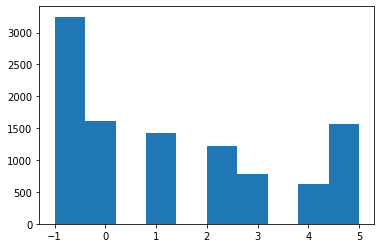

In [176]:
plt.hist(data['Arrival Delay'])
plt.show()

In [131]:
xgb.feature_importances_.argmin()

1

In [132]:
data = data.drop(['Status'],axis = 1)
data = data.drop(['weather__hourly__windspeedKmph'],axis = 1)

In [133]:
xgb.feature_importances_

array([2.90332549e-01, 0.00000000e+00, 5.73420786e-02, 4.00014741e-02,
       1.65682100e-02, 2.52535293e-02, 5.15871815e-02, 1.54577741e-02,
       6.10812457e-02, 0.00000000e+00, 1.20733076e-04, 3.04834402e-03,
       3.14227407e-03, 2.03394525e-03, 3.33412178e-03, 1.13989202e-02,
       8.81368713e-02, 6.90119003e-03, 5.44773010e-02, 6.11584568e-02,
       9.91427475e-02, 2.06433623e-02, 6.79471524e-03, 4.22789491e-03,
       7.03168766e-03, 1.31294534e-02, 1.06445112e-02, 1.70437490e-02,
       5.94816914e-04, 9.86531347e-03, 6.61259283e-03, 1.07070241e-03,
       9.64863576e-04, 6.04356799e-03, 4.81382172e-03])

In [149]:
for i in range(data.shape[0]):
    if data['Arrival Delay'][i] < 0 :
        data['Arrival Delay'][i] = -1
    if data['Arrival Delay'][i] > 0 and data['Arrival Delay'][i] < 10:
        data['Arrival Delay'][i] = 1
    if data['Arrival Delay'][i] >= 10 and data['Arrival Delay'][i] < 20:
        data['Arrival Delay'][i] = 2
    if data['Arrival Delay'][i] >= 20 and data['Arrival Delay'][i] < 30:
        data['Arrival Delay'][i] = 3
    if data['Arrival Delay'][i] >= 30 and data['Arrival Delay'][i] < 40:
        data['Arrival Delay'][i] = 4
    if data['Arrival Delay'][i] >= 40: 
        data['Arrival Delay'][i] = 5    

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

In [150]:
data['Arrival Delay'].value_counts()

-1    3249
 0    1613
 5    1571
 1    1431
 2    1223
 3     782
 4     624
Name: Arrival Delay, dtype: int64

In [151]:
def loss_func(y_true,y_pred):
    loss = 0
    for i in range(y_true.size):
        diff = abs(y_true[i] - y_pred[i])
        loss += diff
    return loss
            

In [178]:
X_train

,ARR,Status,Distance,Passenger Load Factor,Airline Rating,Airport Rating,Market Share,OTP Index,Date,Month,...,From_CCU,From_DEL,To_DEL,To_HYD,Airline_Air India,Airline_Go Air,Airline_Indigo,Airline_SpiceJet,Airline_Spicejet,Airline_Vistara
5489,23,1,1736,90.1,0.7,0.90,47.5,81.1,4,12,...,0,0,1,0,0,0,1,0,0,0
9969,3,1,1736,90.0,0.4,0.90,16.3,76.8,21,10,...,0,0,1,0,0,0,0,0,1,0
2818,23,1,1312,80.0,0.5,0.86,11.9,64.2,25,12,...,1,0,1,0,1,0,0,0,0,0
2541,23,1,1244,81.1,0.8,0.88,6.1,82.9,28,12,...,0,1,0,1,0,0,0,0,0,1
4079,10,1,1312,90.1,0.7,0.86,47.5,81.1,15,12,...,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,22,1,1736,89.0,0.7,0.90,47.5,81.1,23,1,...,0,0,1,0,0,0,1,0,0,0
2514,7,1,848,92.7,0.4,0.90,16.5,76.8,28,12,...,0,0,0,0,0,0,0,0,1,0
6637,6,1,848,84.9,0.7,0.90,47.5,81.1,25,11,...,0,0,0,0,0,0,1,0,0,0
2575,0,1,1736,80.0,0.5,0.90,11.9,64.2,27,12,...,0,0,1,0,1,0,0,0,0,0


In [205]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV
xgb = xgboost.XGBClassifier(n_estimators = 100,max_depth = 5, learning_rate = 0.1,booster = "gbtree",n_jobs = -1,gamma = 0.1,reg_alpha = 0.1, reg_lambda = 0.1,random_state = 1)
dist = {"n_estimators" : np.arange(100,200), "max_depth" : np.arange(2,10), "learning_rate" : np.linspace(0.1,1,10),"gamma" : np.linspace(0.1,1,10),"reg_alpha" : np.linspace(0.1,1,10), "reg_lambda" :  np.linspace(0.1,1,10)}
RCV = RandomizedSearchCV(xgb,dist,random_state = 2,n_iter = 100)
ran_fit = RCV.fit(X_train,y_train)
# from sklearn.metrics import accuracy_score

# xgb.fit(X_train,y_train)


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.7064569930903026
0.5026202953787517


In [206]:
print(ran_fit.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.9,
              learning_rate=0.2, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=139, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=1,
              reg_alpha=0.7000000000000001, reg_lambda=0.8, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)


In [214]:
xgb = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1.0,
              learning_rate=0.30000000000000004, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=144, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=1,
              reg_alpha=0.7000000000000001, reg_lambda=0.7000000000000001,
              scale_pos_weight=1, seed=None, silent=None, subsample=1,
              verbosity=1)
xgb.fit(X_train,y_train)
print(accuracy_score(xgb.predict(X_train),y_train))
print(accuracy_score(xgb.predict(X_test),y_test))

0.7928282106266381
0.49261553120533585


In [215]:
xgb = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.9,
              learning_rate=0.2, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=139, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=1,
              reg_alpha=0.7000000000000001, reg_lambda=0.8, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)
xgb.fit(X_train,y_train)
print(accuracy_score(xgb.predict(X_train),y_train))
print(accuracy_score(xgb.predict(X_test),y_test))

0.7840123898022396
0.4916626965221534


In [216]:
np.where(xgb.feature_importances_ == 0)

(array([ 7, 22, 25, 27, 28, 31], dtype=int64),)

KeyError: 7